## Warmup 0: We've seen these before!

In [1]:
import pandas as pd
import requests
import csv
import os

# AutomateTheBoringStuff
def process_csv(filename):
    file = open(filename, encoding="utf-8")  
    reader = csv.reader(file) 
    data = list(reader)        
    file.close()  
    return data

## Warmup 1: Review the code below!

In [2]:
url = "https://api.weather.gov/gridpoints/MKX/37,63/forecast"
r = requests.get(url)
r.raise_for_status()
weather_data = r.json()
weather_df = pd.DataFrame(weather_data["properties"]["periods"])
weather_df

number             name                  startTime  \
0        1   This Afternoon  2024-04-06T14:00:00-05:00   
1        2          Tonight  2024-04-06T18:00:00-05:00   
2        3           Sunday  2024-04-07T06:00:00-05:00   
3        4     Sunday Night  2024-04-07T18:00:00-05:00   
4        5           Monday  2024-04-08T06:00:00-05:00   
5        6     Monday Night  2024-04-08T18:00:00-05:00   
6        7          Tuesday  2024-04-09T06:00:00-05:00   
7        8    Tuesday Night  2024-04-09T18:00:00-05:00   
8        9        Wednesday  2024-04-10T06:00:00-05:00   
9       10  Wednesday Night  2024-04-10T18:00:00-05:00   
10      11         Thursday  2024-04-11T06:00:00-05:00   
11      12   Thursday Night  2024-04-11T18:00:00-05:00   
12      13           Friday  2024-04-12T06:00:00-05:00   
13      14     Friday Night  2024-04-12T18:00:00-05:00   

                      endTime  isDaytime  temperature temperatureUnit  \
0   2024-04-06T18:00:00-05:00       True           54               F   
1   2024-04-07T06:00:00-05:00      False           34               F   
2   2024-04-07T18:00:00-05:00       True           46               F   
3   2024-04-08T06:00:00-05:00      False           42               F   
4   2024-04-08T18:00:00-05:00       True           64               F   
5   2024-04-09T06:00:00-05:00      False           42               F   
6   2024-04-09T18:00:00-05:00       True           63               F   
7   2024-04-10T06:00:00-05:00      False           39               F   
8   2024-04-10T18:00:00-05:00       True           63               F   
9   2024-04-11T06:00:00-05:00      False           44               F   
10  2024-04-11T18:00:00-05:00       True           60               F   
11  2024-04-12T06:00:00-05:00      False           41               F   
12  2024-04-12T18:00:00-05:00       True           57               F   
13  2024-04-13T06:00:00-05:00      False           38               F   

   temperatureTrend                      probabilityOfPrecipitation  \
0              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
1              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
2              None    {'unitCode': 'wmoUnit:percent', 'value': 80}   
3              None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
4              None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
5              None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
6              None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
7              None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
8              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
9              None    {'unitCode': 'wmoUnit:percent', 'value': 30}   
10             None    {'unitCode': 'wmoUnit:percent', 'value': 50}   
11             None    {'unitCode': 'wmoUnit:percent', 'value': 50}   
12             None    {'unitCode': 'wmoUnit:percent', 'value': 20}   
13             None  {'unitCode': 'wmoUnit:percent', 'value': None}   

                                             dewpoint  \
0            {'unitCode': 'wmoUnit:degC', 'value': 0}   
1   {'unitCode': 'wmoUnit:degC', 'value': 0.555555...   
2   {'unitCode': 'wmoUnit:degC', 'value': 4.444444...   
3   {'unitCode': 'wmoUnit:degC', 'value': 6.111111...   
4   {'unitCode': 'wmoUnit:degC', 'value': 7.222222...   
5   {'unitCode': 'wmoUnit:degC', 'value': 7.777777...   
6   {'unitCode': 'wmoUnit:degC', 'value': 7.222222...   
7   {'unitCode': 'wmoUnit:degC', 'value': 5.555555...   
8   {'unitCode': 'wmoUnit:degC', 'value': 5.555555...   
9   {'unitCode': 'wmoUnit:degC', 'value': 6.111111...   
10  {'unitCode': 'wmoUnit:degC', 'value': 6.111111...   
11  {'unitCode': 'wmoUnit:degC', 'value': 4.444444...   
12  {'unitCode': 'wmoUnit:degC', 'value': 0.555555...   
13  {'unitCode': 'wmoUnit:degC', 'value': 0.555555...   

                                relativeHumidity     windSpeed windDirection  \
0   {'unitCode': 'wmoUnit:percent',

## Warmup 2a: How many of the days is the wind direction `E`?

In [3]:
# write your code here
len(weather_df[weather_df["windDirection"] == 'E'])

3

## Warmup 2b: How many of the days is the wind direction `E`, `NE`, or `SE`?

In [4]:
# write your code here
len(weather_df[(weather_df["windDirection"] == 'E') | (weather_df["windDirection"] == 'NE') | (weather_df["windDirection"] == 'SE')])

5

## Warmup 3: Of the daytime periods, what percentage are sunny?

In [5]:
# write your code here
daytime_forecasts = weather_df[weather_df["isDaytime"]]
num_cloudy = len(daytime_forecasts[daytime_forecasts["shortForecast"].str.lower().str.contains("sunny")])
(num_cloudy / len(daytime_forecasts)) * 100

57.14285714285714

## Warmup 4a: Of the days where the temperature is above `50`, what is the wind speed forecast?

In [6]:
# write your code here
winds = weather_df[weather_df["temperature"] > 50]["windSpeed"]
winds

0           10 mph
4     10 to 20 mph
6      5 to 20 mph
8      5 to 10 mph
10    10 to 15 mph
12    15 to 25 mph
Name: windSpeed, dtype: object

## Warmup 4b: What was the maximum predicted wind speed on those days?

In [7]:
# write your code here
better_winds = winds.str[:-4]
best_winds = better_winds.apply(lambda wind : int(wind) if " to " not in wind else int(wind.split(" to ")[1]))
best_winds.max()

25

# Lecture 30: Web 2 - Generating HTML

Learning Objectives:

- Type by hand a basic HTML page with a list, a link, and a table
- Convert a Python list into an HTML unordered list
- Convert a Python dictionary of URLs into an HTML of hyperlinks
- Convert a Pandas DataFrame into an HTML table

## Exercise 1: Type by hand a basic HTML page with a list, a link, and a table

Markdown and Jupyter Notebook will recognize HTML tags.

`Esc` -> `m`

Otherwise, "Cell" -> "Cell Type" -> "Markdown"

#### Practice the following tags in the cell below: 
 - `h#`
 - `p`
 - `i`
 - `b`
 - `br`
 - `img`

---

<i>Make a new Jupyter Notebook text file in this directory.</i>
<p> The head, body, and html tags are not necessary 
for a browser to read a file.</p>

<h2> Happy Friday!! </h2>

<p>It's going to be a <b>fun</b> day <br><br><br></p>

<p>Note that br does not have a close tag<p>
    
<img src="https://www.python.org/static/img/python-logo@2x.png">

---

#### Hyperlink tags have an anchor tag and a href attribute
`a`: anchor

`href=` : hyper references 

---

The Canvas page for this course can be found
<a href="https://canvas.wisc.edu/courses/399772">here</a>.

---

#### Unordered List Tags
`ul` : starts an unordered list

`li` : add a list item
Un-ordered list example:

---

<h6>Favorite Data Structures</h6>
<ul>
    <li>DataFrames</li>
    <li>Dictionaries</li>
    <li>Lists</li>
</ul>

---

#### HTML Table Tags

`table`: start and end of a table

`tr`: start and end of a new row

`th`: a cell in the top row ... is bold

`td`: a cell inside a row

Add a few rows to the table below:

---

<table>
  <tr>
    <th>State</th>
    <th>Capital City</th>
  </tr>
  <tr>
    <td>Wisconsin</td>
    <td>Madison</td>
  </tr>
  <tr>
    <td>Indiana</td>
    <td>Indianapolis</td>
  </tr>
   <tr>
    <td>Illinois</td>
    <td>Springfield</td>
  </tr>
</table>

---

## Exercise 2: Convert a Python list into an HTML unordered list

Given:  

`health_tips = ["Eat Healthy", "Exercise", "Relax", "Sleep"]`
    
Convert this Python list into a HTML ordered list:

<ul>
    <li>Eat Healthy</li>      
    <li>Exercise</li>
    <li>Relax</li>
    <li>Sleep</li>
</ul> 

In [8]:
def list_to_html(my_list, path):
    """`list_to_html` turns `my_list` into an unordered HTML list,
    and writes it into the HTML file at `path`"""
    # TODO: open the file for writing
    f = open(path, "w", encoding='utf-8')
    
    # TODO: write the <ul> and \n
    f.write("<ul>\n")
    
    # TODO: write each item in the list with a \n after each </li>
    for item in my_list:
        f.write("<li>" + item + "</li>\n")

    # TODO: write the </ul> and \n
    f.write("</ul>\n")
    
    # TODO: close the file
    f.close()

#### Run the following cell, then check that you made your document!

In [9]:
todo_list = ["Eat Healthy", "Exercise", "Relax", "Sleep"]
list_to_html(todo_list, "todolist.html")

## Exercise 3: Convert a Dictionary of Web Site Name, URL into a HTML page of hyperlinks

In [10]:
fav_sites = {
    "National Weather Service": "http://weather.gov",
    "Short Stack Eatery": "https://shortstackeats.com/",
}

In [11]:
# write your code here
html_string = ''
for key in fav_sites:
    html_string += '<a href="' + fav_sites[key] + '">' + key + '</a><br>\n'
print(html_string)   

<a href="http://weather.gov">National Weather Service</a><br>
<a href="https://shortstackeats.com/">Short Stack Eatery</a><br>



Paste your code in the markdown cell below to test it!

<a href="http://weather.gov">National Weather Service</a><br><a href="https://shortstackeats.com/">Short Stack Eatery</a><br>

#### Now that we know it works, open a file `mylinks.html` for writing and write the string to a file

In [12]:
# write your code here
f = open("mylinks.html", "w", encoding='utf-8')
f.write(html_string)
f.close()

## Exercise 4: Convert a Pandas DataFrame into a HTML table

Is there an easy way to make a HTML table?

Yes, Pandas has a DataFrame method `.to_html()`

#### Load from the `new_movie_data.csv` file into a dataframe called `movies`

In [13]:
# write your code here
movies = pd.read_csv("new_movie_data.csv")
movies

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0  126.46M  
2     2016      117     7.3  138.12M  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

#### Convert the movies DataFrame to html using `.to_html()`

In [14]:
# write your code here
movies_html = movies.to_html()
movies_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Title</th>\n      <th>Genre</th>\n      <th>Director</th>\n      <th>Cast</th>\n      <th>Year</th>\n      <th>Runtime</th>\n      <th>Rating</th>\n      <th>Revenue</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Guardians of the Galaxy</td>\n      <td>Action,Adventure,Sci-Fi</td>\n      <td>James Gunn</td>\n      <td>Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana</td>\n      <td>2014</td>\n      <td>121</td>\n      <td>8.1</td>\n      <td>333.13</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Prometheus</td>\n      <td>Adventure,Mystery,Sci-Fi</td>\n      <td>Ridley Scott</td>\n      <td>Noomi Rapace, Logan Marshall-Green, Michael         fassbender, Charlize Theron</td>\n      <td>2012</td>\n      <td>124</td>\n      <td>7.0</td>\n      <td>126.46M</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Split</td>\n      <td>Horr

#### Write it to a file

In [15]:
# write your code here
f = open("movies_table.html", "w", encoding='utf-8')
f.write(movies_html)
f.close()

## Demo: CSV File to Webpages

#### Read in the `reviews.csv` file

In [16]:
amazon_csv = process_csv("reviews.csv")
header = amazon_csv[0]
reviews = amazon_csv[1:]
reviews[1]

['99904',
 'amazon power fast usb charger',
 'got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire',
 '5',
 'True',
 '2',
 '2016-06-03']

#### Create the folder `data` if it does not already exist

In [17]:
if not os.path.exists("data"):
    os.mkdir("data")

#### Example Review Page

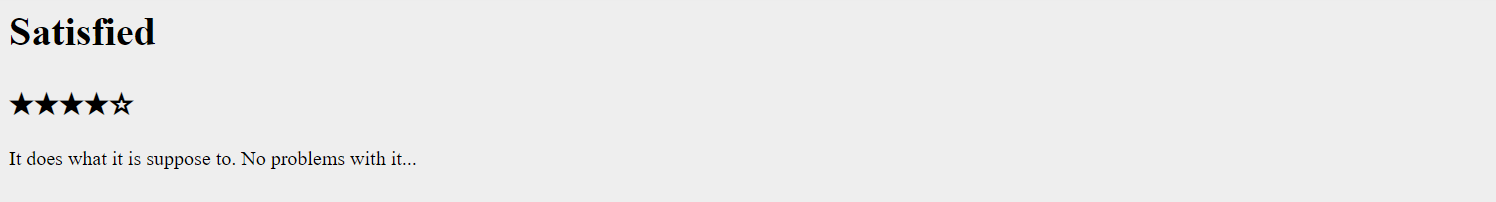

#### Get the HTML data for a single review page

In [18]:
def get_amazon_review_html(review_data):
    review_id = review_data[0] # should use header.index for these!
    title = review_data[1]
    text = review_data[2]
    rating = int(review_data[3])
    
    html_review = ""
    html_review += f"<h1>{title}</h1>\n"
    html_review += f"<h2>{'&starf;'*rating}{'&star;'*(5-rating)}</h2>\n"
    html_review += f"<p>{text}</p>\n"
    return html_review

#### Use `get_amazon_review_html` to write to `my_review.html` for a random review

In [19]:
html_file = open("my_review.html", "w", encoding='utf-8')
amazon_review_html = get_amazon_review_html(reviews[9])
html_file.write(amazon_review_html)
html_file.close()

#### For each Amazon review, write to a file `data/<id>.html` ; e.g. `data/3966.html`

In [20]:
for amazon_review in reviews:
    amazon_review_id = amazon_review[header.index("review id")]
    html_file = open(os.path.join("data", amazon_review_id + ".html"), "w", encoding='utf-8')
    amazon_review_html = get_amazon_review_html(amazon_review)
    html_file.write(amazon_review_html)
    html_file.close()

#### Example Parent Page


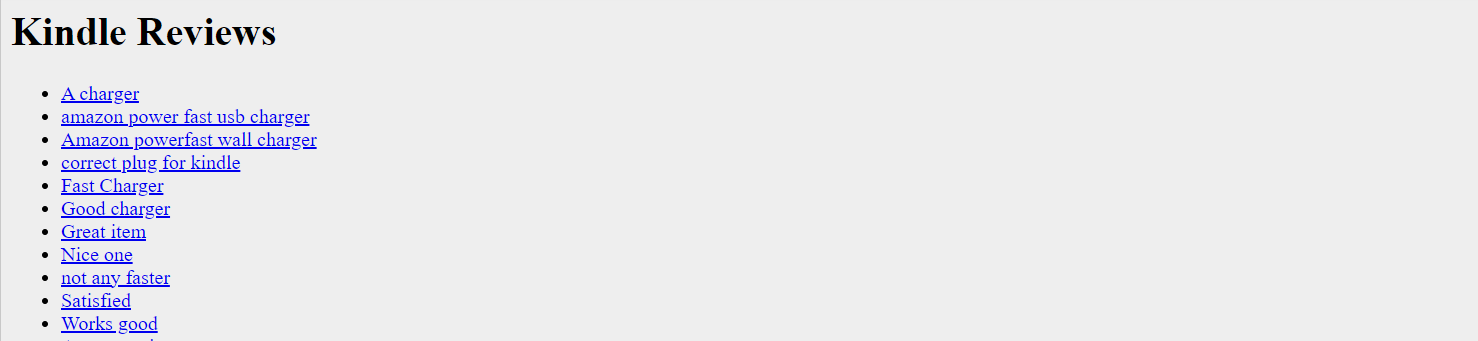

Hint: We can create a link to a child page by formatting the code...

`<li><a href = "{}">{}</a></li>\n`

#### Create a parent page that is an unordered list with links to each review

In [21]:
parent_html = ""
parent_html += "<h1>Kindle Reviews</h1>\n"
parent_html += "<ul>\n"
for amazon_review in reviews:
    amazon_review_id = amazon_review[0] # should use header.index for these
    amazon_review_title = amazon_review[1]
    
    path_to_review = os.path.join("data", amazon_review_id + ".html")
    review_link = f'<li><a href = "{path_to_review}">{amazon_review_title}</a></li>\n'
    parent_html += review_link
parent_html += "</ul>\n"

all_reviews_file = open("all_reviews.html", "w", encoding='utf-8')
all_reviews_file.write(parent_html)
all_reviews_file.close()

### Nefarious HTML Generation

It's a Friday! This is just a fun thought experiment. For this lecture, we have choosen the "happy path" for generating HTML. How could a nefarious actor abuse the code we made?

In [22]:
list_to_html(["hey", "hi", "<h3>hello world</h3>"], "oops1.html")

In [23]:
list_to_html(["hey", "hi", "<script>alert(0)</script>"], "oops2.html")

In [24]:
list_to_html(["hey", "hi", "<script>alert(localStorage.getItem('ssn') + '--> server')</script>"], "oops3.html")